## **IRIS FLOWER CLASSIFICATION MODEL**

The Iris flower dataset encompasses three distinct species: setosa,
versicolor, and virginica.
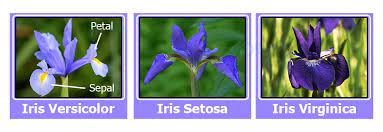

• The goal is to train a machine learning model capable of learning from these measurements and proficiently categorizing Iris flowers into their corresponding species.




**Importing the Libraries and Dataset**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

df=pd.read_csv('/content/IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

**Data Processing**

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Data Cleaning**



*   Check the missingvalues and fill it with proper way.



In [ ]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

There is no missing values in our iris dataframe.

**Data Visualization**

Finding the correlation between the columns present in our dataset.

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

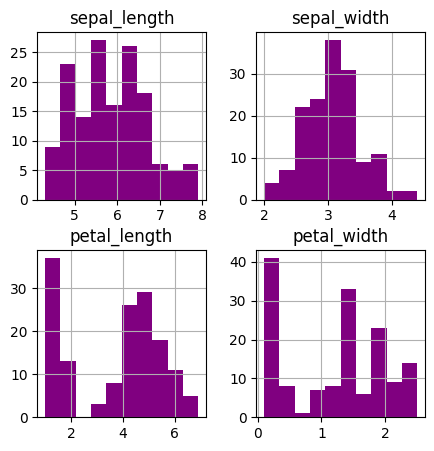

In [ ]:
#Ploting distribution
df.hist(figsize=(5,5),color='purple')


<Axes: >

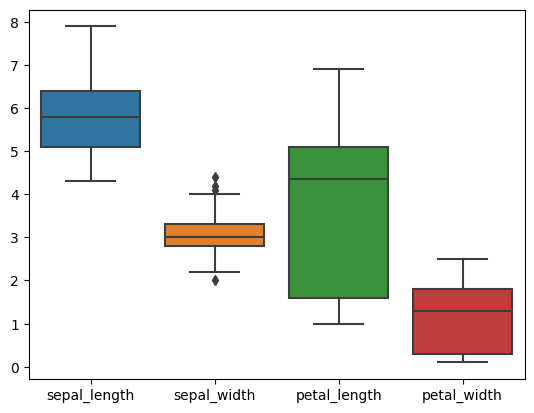

In [ ]:
#Boxplot : to remove the outletvalues.
sns.boxplot(df)

In our dataset , the datas in the 'Sepalwidth' column only contain outlayer values.

In [ ]:
# Calculate the interquartile range (IQR)
Q1 = df['sepal_width'].quantile(0.25)
Q3 = df['sepal_width'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where sepal_width is outside the bounds
df1 = df[(df['sepal_width'] >= lower_bound) & (df['sepal_width'] <= upper_bound)]


<Axes: >

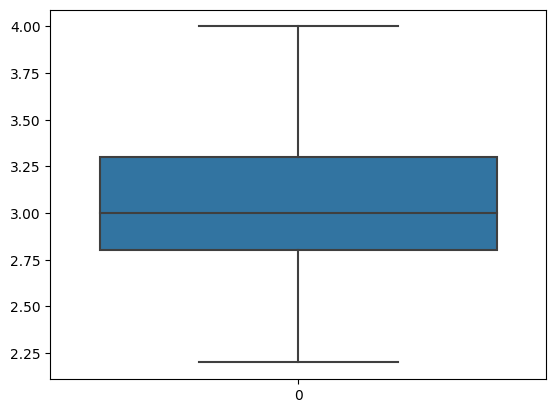

In [ ]:
sns.boxplot(df1['sepal_width'])

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

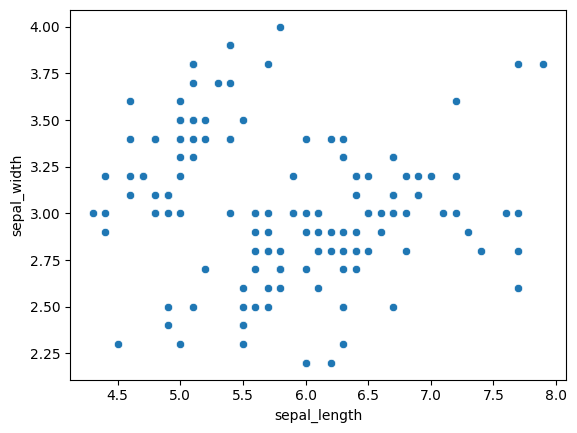

In [ ]:
#Saccaterplot
#  1. Sepallenth v/s Sepalwidth
sns.scatterplot(x='sepal_length',y='sepal_width',data=df1)

<Axes: xlabel='petal_length', ylabel='petal_width'>

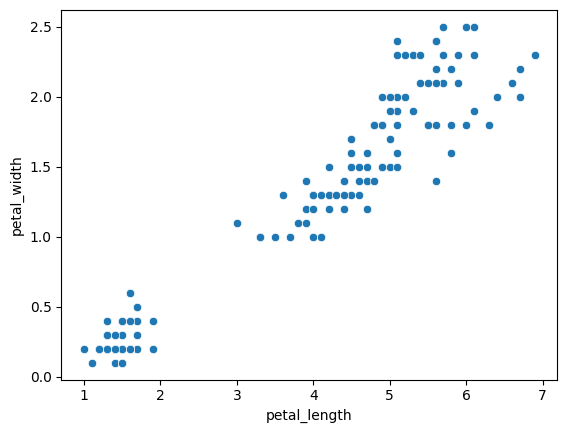

In [ ]:
  #2. Petallegth v/s Petalwidth.
sns.scatterplot(x='petal_length',y='petal_width',data=df1)


From this graph we can summerize that the petal lenth and petal width are directly propotional to each other.

<ipython-input-22-fdda9083937f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()
<ipython-input-22-fdda9083937f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot=True)


<Axes: >

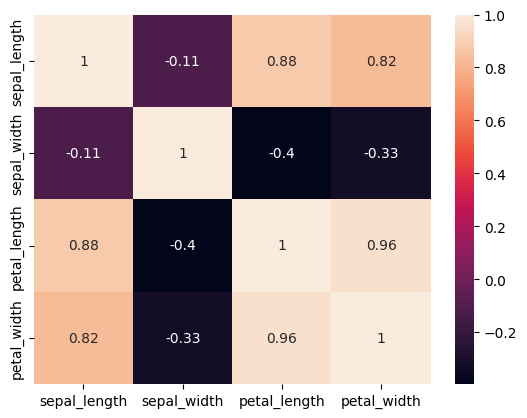

In [ ]:
# HeatMap : Pairwise correlation of all the columns in the iris dataframe
df1.corr()
sns.heatmap(df1.corr(),annot=True)

**Input and Output Separation**

In [ ]:
x=df1.iloc[:,:-1].values
y=df1.iloc[:,-1].values
x
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',


**Training and Testing Data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
x_train

array([[5.6, 2.8, 4.9, 2. ],
       [6.4, 3.1, 5.5, 1.8],
       [4.7, 3.2, 1.6, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [6.7, 2.5, 5.8, 1.8],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [4.8, 3.4, 1.9, 0.2],
       [6. , 3.4, 4.5, 1.6],
       [6.1, 2.8, 4.7, 1.2],
       [4.6, 3.2, 1.4, 0.2],
       [5.4, 3.9, 1.3, 0.4],
       [7.1, 3. , 5.9, 2.1],
       [4.4, 3.2, 1.3, 0.2],
       [5.2, 2.7, 3.9, 1.4],
       [5.5, 2.5, 4. , 1.3],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2.5, 3.9, 1.1],
       [6.7, 3.1, 4.7, 1.5],
       [5.8, 2.8, 5.1, 2.4],
       [7. , 3.2, 4.7, 1.4],
       [7.7, 3.8, 6.7, 2.2],
       [6.3, 2.5, 5. , 1.9],
       [5.5, 3.5, 1.3, 0.2],
       [5.5, 2.6, 4.4, 1.2],
       [5.7, 2.8, 4.1, 1.3],
       [5.6, 3. , 4.5, 1.5],
       [6.7, 3. , 5. , 1.7],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 3.3, 4.7, 1.6],
       [5.4, 3.9, 1.7, 0.4],
       [6.3, 2.8, 5.1, 1.5],
       [5.1, 2.5, 3. , 1.1],
       [6.9, 3.1, 4.9, 1.5],
       [4.4, 3

In [ ]:
x_test

array([[5.3, 3.7, 1.5, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.2, 3.4, 1.4, 0.2],
       [5.4, 3.4, 1.7, 0.2],
       [4.8, 3. , 1.4, 0.3],
       [6.7, 3.3, 5.7, 2.1],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3. , 4.5, 1.5],
       [5.9, 3.2, 4.8, 1.8],
       [5.1, 3.8, 1.5, 0.3],
       [4.8, 3. , 1.4, 0.1],
       [6. , 2.2, 5. , 1.5],
       [6.7, 3. , 5.2, 2.3],
       [5.8, 2.7, 3.9, 1.2],
       [6.9, 3.1, 5.1, 2.3],
       [5.1, 3.4, 1.5, 0.2],
       [5.6, 2.9, 3.6, 1.3],
       [6.8, 3.2, 5.9, 2.3],
       [5.4, 3.4, 1.5, 0.4],
       [6.6, 2.9, 4.6, 1.3],
       [6.3, 3.3, 6. , 2.5],
       [6.2, 2.8, 4.8, 1.8],
       [4.8, 3.4, 1.6, 0.2],
       [6.1, 2.8, 4. , 1.3],
       [4.9, 3.1, 1.5, 0.1],
       [6.2, 2.9, 4.3, 1.3],
       [6.2, 2.2, 4.5, 1.5],
       [7.6, 3. , 6.6, 2.1],
       [7.7, 2.6, 6.9, 2.3],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 3.6, 1.4, 0.2],
       [5.2, 3.5, 1.5, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2.8, 5.6, 2.2],
       [5.1, 3

In [ ]:
y_train

array(['Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa

In [ ]:
y_test

array(['Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa'], dtype=object)

**Scaling / Normalization**

In [ ]:
# Here we use MinMaxScalar normalization technique.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train,x_test)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
x_train

array([[0.36111111, 0.33333333, 0.68421053, 0.79166667],
       [0.58333333, 0.5       , 0.78947368, 0.70833333],
       [0.11111111, 0.55555556, 0.10526316, 0.04166667],
       [0.19444444, 0.72222222, 0.10526316, 0.20833333],
       [0.66666667, 0.16666667, 0.84210526, 0.70833333],
       [0.19444444, 0.44444444, 0.10526316, 0.04166667],
       [0.19444444, 0.66666667, 0.10526316, 0.125     ],
       [0.13888889, 0.66666667, 0.15789474, 0.04166667],
       [0.47222222, 0.66666667, 0.61403509, 0.625     ],
       [0.5       , 0.33333333, 0.64912281, 0.45833333],
       [0.08333333, 0.55555556, 0.07017544, 0.04166667],
       [0.30555556, 0.94444444, 0.05263158, 0.125     ],
       [0.77777778, 0.44444444, 0.85964912, 0.83333333],
       [0.02777778, 0.55555556, 0.05263158, 0.04166667],
       [0.25      , 0.27777778, 0.50877193, 0.54166667],
       [0.33333333, 0.16666667, 0.52631579, 0.5       ],
       [0.22222222, 0.61111111, 0.12280702, 0.16666667],
       [0.36111111, 0.16666667,

In [ ]:
x_test

array([[0.27777778, 0.83333333, 0.0877193 , 0.04166667],
       [0.41666667, 0.27777778, 0.71929825, 0.75      ],
       [0.25      , 0.66666667, 0.07017544, 0.04166667],
       [0.30555556, 0.66666667, 0.12280702, 0.04166667],
       [0.13888889, 0.44444444, 0.07017544, 0.08333333],
       [0.66666667, 0.61111111, 0.8245614 , 0.83333333],
       [0.13888889, 0.5       , 0.10526316, 0.04166667],
       [0.30555556, 0.44444444, 0.61403509, 0.58333333],
       [0.44444444, 0.55555556, 0.66666667, 0.70833333],
       [0.22222222, 0.88888889, 0.0877193 , 0.08333333],
       [0.13888889, 0.44444444, 0.07017544, 0.        ],
       [0.47222222, 0.        , 0.70175439, 0.58333333],
       [0.66666667, 0.44444444, 0.73684211, 0.91666667],
       [0.41666667, 0.27777778, 0.50877193, 0.45833333],
       [0.72222222, 0.5       , 0.71929825, 0.91666667],
       [0.22222222, 0.66666667, 0.0877193 , 0.04166667],
       [0.36111111, 0.38888889, 0.45614035, 0.5       ],
       [0.69444444, 0.55555556,

**MODEL CREATION**
  
  In Classification model we have  different algorithms for model creation.

  1. Support Vector Machine(SVM Algorithm)
  2. Random Forest Algorithm.

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
model=SVC()
rf=RandomForestClassifier(n_estimators=100)

**PERFORMANCE MEASURMENTS**

Matrics used :

Confusion matrics

 Accuracy score

Classification report

 Confusion matrics display

In [ ]:
#svm
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa'], dtype=object)

Confusion Matrics : [[17  0  0]
 [ 0 11  0]
 [ 0  0 16]]
**************************************************
Accuracy Score : 1.0
**************************************************
Classification Report :                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        44
      macro avg       1.00      1.00      1.00        44
   weighted avg       1.00      1.00      1.00        44

**************************************************


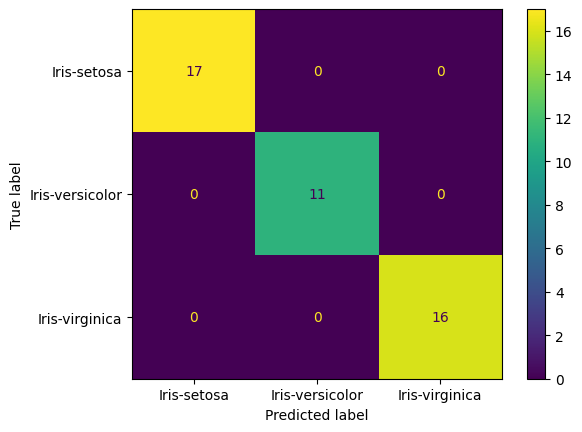

In [ ]:

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred)
print('Confusion Matrics :',result)
print("*"*50)
print("Accuracy Score :",accuracy_score(y_test,y_pred))
print("*"*50)
print('Classification Report :',classification_report(y_test,y_pred))
print("*"*50)
labels=['Iris-setosa','Iris-versicolor','Iris-virginica']
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

In [44]:
#random forest
rf.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa'], dtype=object)

Confusion Matrics : [[17  0  0]
 [ 0 11  0]
 [ 0  0 16]]
**************************************************
Accuracy Score : 1.0
**************************************************
Classification Report :                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        44
      macro avg       1.00      1.00      1.00        44
   weighted avg       1.00      1.00      1.00        44

**************************************************


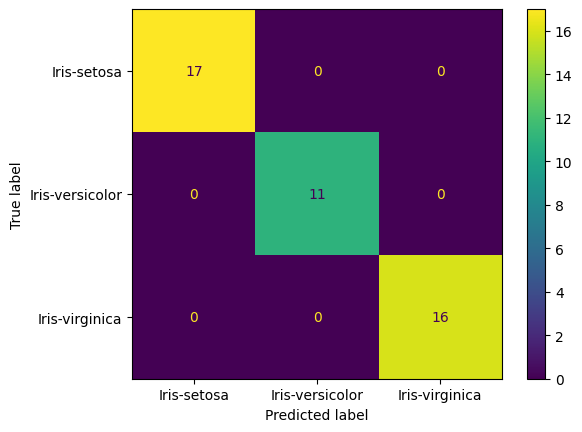

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred)
print('Confusion Matrics :',result)
print("*"*50)
print("Accuracy Score :",accuracy_score(y_test,y_pred))
print("*"*50)
print('Classification Report :',classification_report(y_test,y_pred))
print("*"*50)
labels=['Iris-setosa','Iris-versicolor','Iris-virginica']
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

In [46]:
print(rf.predict([[5.9,3.0,5.1,1.8]]))

['Iris-virginica']


In conclusion, both 2 models Random Forest and SVM give 100% of accuracy. Both of these models are best fit for iris dataset.